<a href="https://www.kaggle.com/code/thirumani/shark-tank-australia-data-analysis?scriptVersionId=173154466" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <p style="background-color:#800080;color:white;font-size:24px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #800080;">SharkTank Australia Exploratory Data Analysis (EDA)</p>
## Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-australia-dataset

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"), "with Python version")
!python --version

Notebook was last executed on: 2024-Apr-21 with Python version
Python 3.10.13


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/5/50/Shark_Tank_Australia_logo.png', width=360, height=270)

## ⚒️ Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

## ⏳ Check and import dataset

In [4]:
! ls -l /kaggle/input/shark-tank-australia-dataset/
shark_tank = pd.read_csv('/kaggle/input/shark-tank-australia-dataset/Shark Tank Australia dataset.csv', encoding = "ISO-8859-1")

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 28
-rw-r--r-- 1 nobody nogroup 25218 Apr 21 10:17 'Shark Tank Australia dataset.csv'

There are 113 rows and 52 columns in the dataset


## 💵 Exploratory Data Analysis (EDA)

In [5]:
shark_tank.head(5)

Season Number     Startup Name  Episode Number  Pitch Number Season Start  \
0              1   Cricket Cooler               1             1     8-Feb-15   
1              1     Rent ResumÃ©               1             2     8-Feb-15   
2              1      Case Boards               1             3     8-Feb-15   
3              1           Hamdog               1             4     8-Feb-15   
4              1  Edible Bug Shop               2             5     8-Feb-15   

  Season End Original Air Date                 Industry  \
0   7-Jun-15          8-Feb-15  Fitness/Sports/Outdoors   
1   7-Jun-15          8-Feb-15            Software/Tech   
2   7-Jun-15          8-Feb-15              Electronics   
3   7-Jun-15          8-Feb-15        Food and Beverage   
4   7-Jun-15         15-Feb-15        Business Services   

                                Business Description  Company Website  \
0               An esky with attached cricket stumps              NaN   
1  Online rental subscription that details rental...              NaN   
2  Portable, electric remote controlled skateboar...              NaN   
3                  hamburger and hot dog combination              NaN   
4  Edible insect business selling ground cricket ...              NaN   

   Pitchers Gender  Pitchers City  Pitchers State  Pitchers Average Age  \
0              NaN            NaN             NaN                   NaN   
1              NaN            NaN             NaN                   NaN   
2              NaN            NaN             NaN                   NaN   
3              NaN            NaN             NaN                   NaN   
4              NaN            NaN             NaN                   NaN   

            Entrepreneur Names  Multiple Entrepreneurs  Viewers  \
0  Adam Dubrich & Leigh Warren                       1  616,000   
1                 Darren Smith                       0  616,000   
2                   Adam Riley                       0  616,000   
3                  Mark Murray                       0  616,000   
4               Skye Blackburn                       0  688,000   

   Original Ask Amount  Original Offered Equity  Valuation Requested  \
0               280000                     20.0              1400000   
1              2500000                     40.0              6250000   
2                20000                     10.0               200000   
3                    1                     25.0                    4   
4               170000                     20.0               850000   

   Received Offer  Accepted Offer  Total Deal Amount  Total Deal Equity  \
0               1             1.0           280000.0               20.0   
1               0             NaN                NaN                NaN   
2               1             1.0            40000.0               35.0   
3               1             1.0                2.0               50.0   
4               1             1.0           170000.0               50.0   

   Deal Valuation  ...  Equity Per Shark  Royalty Deal  \
0       1400000.0  ...              20.0           NaN   
1             NaN  ...               NaN           NaN   
2        114286.0  ...              17.5           NaN   
3             4.0  ...              50.0           NaN   
4        340000.0  ...              50.0           NaN   

   Advisory Shares Equity      Loan  Deal Has Conditions  Mentorship  \
0                     NaN  200000.0                  NaN         NaN   
1                     NaN       NaN                  NaN         NaN   
2                     NaN       NaN                  NaN         NaN   
3                     NaN       NaN                  NaN         NaN   
4                     NaN       NaN                  NaN         NaN   

  Steve Investment Amount Steve Investment Equity  Janine Investment Amount  \
0                     NaN                     NaN                       NaN   
1                     NaN                     NaN 

In [6]:
shark_tank.tail(10).T

103  \
Season Number                                                                4   
Startup Name                                                         SpacetoCo   
Episode Number                                                              11   
Pitch Number                                                               104   
Season Start                                                         15-May-18   
Season End                                                            7-Aug-18   
Original Air Date                                                    24-Jul-18   
Industry                                                                   NaN   
Business Description         An Airbnb-style business that matches people w...   
Company Website                                                            NaN   
Pitchers Gender                                                            NaN   
Pitchers City                                                              NaN   
Pitchers State                                                             NaN   
Pitchers Average Age                                                       NaN   
Entrepreneur Names               Daniel Franco, Jeremy Hurst & Daniel McCullen   
Multiple Entrepreneurs                                                       1   
Viewers                                                                499,000   
Original Ask Amount                                                     210000   
Original Offered Equity                                                   14.0   
Valuation Requested                                                    1500000   
Received Offer                                                               1   
Accepted Offer                                                             1.0   
Total Deal Amount                                                     210000.0   
Total Deal Equity                                                         21.0   
Deal Valuation                                                       1000000.0   
Number of Sharks in Deal                                                   1.0   
Investment Amount Per Shark                                           210000.0   
Equity Per Shark                                                          21.0   
Royalty Deal                                                               NaN   
Advisory Shares Equity                                                     NaN   
Loan                                                                       NaN   
Deal Has Conditions                                                        yes   
Mentorship                                                                 NaN   
Steve Investment Amount                                               210000.0   
Steve Investment Equity                                                   21.0   
Janine Investment Amount                                                   NaN   
Janine Investment Equity                                                   NaN   
Andrew Investment Amount                                                   NaN   
Andrew Investment Equity                                                   NaN   
Naomi Investment Amount                                                    NaN   
Naomi Investment Equity                                                    NaN   
Glen Investment Amount                                                     NaN   
Glen Investment Equity                                                     NaN   
Guest Investment Amount                                                    NaN   
Guest Investment Equity                                                    NaN   
Guest Name                                                                 NaN   
Steve Present                                                                1   
Janine Present                                                               1   
Andrew Present                                           

In [7]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())
shark_tank['Pitch Number'] = shark_tank['Pitch Number'].astype(pd.Int32Dtype())

shark_tank['Startup Name'] = shark_tank['Startup Name'].astype(str)
shark_tank['Industry'] = shark_tank['Industry'].astype(str)
shark_tank['Business Description'] = shark_tank['Business Description'].astype(str)

shark_tank['Multiple Entrepreneurs'] = shark_tank['Multiple Entrepreneurs'].astype(pd.Int32Dtype())

shark_tank['Viewers'] = shark_tank['Viewers'].str.replace(',','')
shark_tank['Viewers'] = pd.to_numeric(shark_tank['Viewers'])

In [8]:
shark_tank.sample(10).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1px solid black", 'font-size': '10pt'})

In [9]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Season Number                113 non-null    Int32  
 1   Startup Name                 113 non-null    object 
 2   Episode Number               113 non-null    Int32  
 3   Pitch Number                 113 non-null    Int32  
 4   Season Start                 113 non-null    object 
 5   Season End                   113 non-null    object 
 6   Original Air Date            113 non-null    object 
 7   Industry                     113 non-null    object 
 8   Business Description         113 non-null    object 
 9   Company Website              0 non-null      float64
 10  Pitchers Gender              0 non-null      float64
 11  Pitchers City                0 non-null      float64
 12  Pitchers State               0 non-null      float64
 13  Pitchers Average Age

In [10]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [11]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 4
Number of unique values in Startup Name - 113
Number of unique values in Episode Number - 13
Number of unique values in Pitch Number - 113
Number of unique values in Season Start - 4
Number of unique values in Season End - 4
Number of unique values in Original Air Date - 28
Number of unique values in Industry - 10
Number of unique values in Business Description - 113
Number of unique values in Company Website - 0
Number of unique values in Pitchers Gender - 0
Number of unique values in Pitchers City - 0
Number of unique values in Pitchers State - 0
Number of unique values in Pitchers Average Age - 0
Number of unique values in Entrepreneur Names - 113
Number of unique values in Multiple Entrepreneurs - 2
Number of unique values in Viewers - 27
Number of unique values in Original Ask Amount - 49
Number of unique values in Original Offered Equity - 23
Number of unique values in Valuation Requested - 55
Number of unique values in Received Offer 

In [12]:
# Latest/current season data
shark_tank_recent = shark_tank.loc[(shark_tank['Season Number']==5)]

In [13]:
# Data set information
print(shark_tank['Season Number'].max(), "total seasons in Australia SharkTank\n")
print(shark_tank['Pitch Number'].max(), "#startups came for pitching \n")

4 total seasons in Australia SharkTank

113 #startups came for pitching 



Season Number    1  2  3   4
Episode Number  11  2  2  13


([], [])

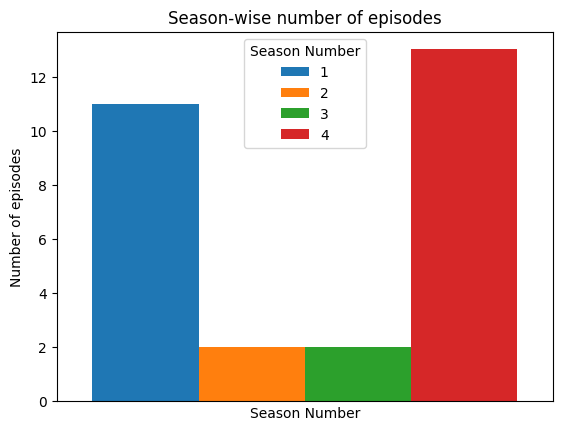

In [14]:
# Season-wise number of episodes
tmp = pd.pivot_table(shark_tank, values='Episode Number', columns='Season Number', aggfunc='max')
print(tmp)
tmp.plot(kind='bar', use_index=False, width=3.0)
plt.xlabel("Season Number")
plt.ylabel("Number of episodes")
plt.title("Season-wise number of episodes")
plt.xticks([])

In [15]:
# Season-wise number of pitches
tmp = shark_tank['Season Number'].value_counts().sort_values()
fig = px.bar(tmp, x=tmp.values, title="<b> Shark Tank Australia - Season-wise number of pitches</b>", template='plotly_white', text=tmp, width=580, height=440)
fig.update_yaxes(tickvals=list(range(16)))
fig.update_xaxes(visible=False)
fig.show()

In [16]:
# There were 3 to 5 pitches, in a each episode
print(shark_tank[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[3 4 5]


In [17]:
# Types of industries, came for investments, in all seasons
tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> Shark Tank AU - Industry wise startups</b>", template='simple_white', text=tmp, width=850, height=700)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

In [18]:
# # Types of industries, came for investment, in current/latest season (5th season)
# tmp = shark_tank_recent['Industry'].value_counts().sort_values(ascending=True)
# fig = px.bar(tmp, x=tmp.values, title="<b> Australia Shark Tank in current/latest season (5th season) - Industry wise startups</b>", template='simple_white', text=tmp, width=820, height=650)
# fig.update_yaxes(title_text="")
# fig.update_xaxes(visible=False)
# fig.show()

In [19]:
# # Gender wise
# print(shark_tank['Pitchers Gender'].value_counts(),"\n")

# # In percentage
# print(round(shark_tank['Pitchers Gender'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

# plt.title("Pitchers Gender wise percentage")
# shark_tank["Pitchers Gender"].value_counts().plot(kind='pie', autopct='%.0f%%', colors=["lightblue", "pink", "gray"], shadow=True, fontsize=14)
# plt.ylabel('')

In [20]:
# # Age wise
# print(shark_tank['Pitchers Average Age'].value_counts(),"\n")

# # In percentage
# print(round(shark_tank['Pitchers Average Age'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

# plt.title("Pitchers Age wise percentage")
# shark_tank["Pitchers Average Age"].value_counts().plot(kind='pie', autopct='%.0f%%', cmap='tab20c', shadow=True, fontsize=14)
# plt.ylabel('')

### 💹 60% companies received offers and 40% startups could not convince Sharks to invest

Accepted Offer
1.0    53
0.0    12
Name: count, dtype: int64 

Accepted Offer
1.0    82%
0.0    18%
Name: proportion, dtype: object


Text(0, 0.5, '')

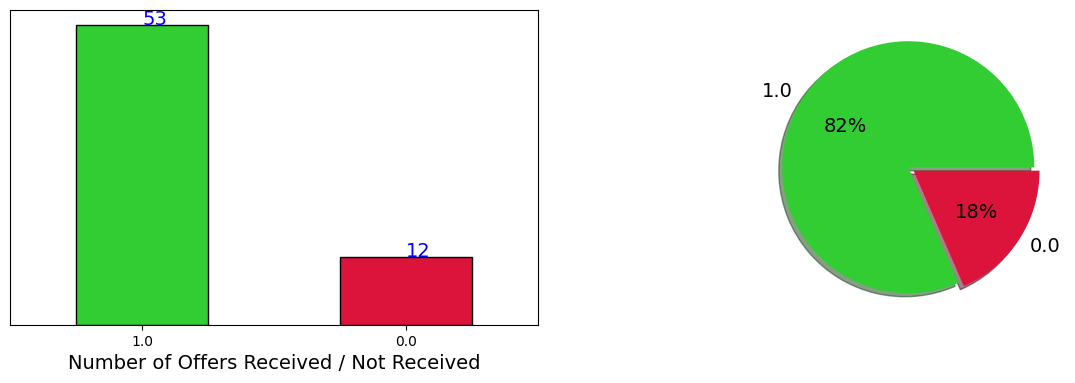

In [21]:
# Offers received
print(shark_tank['Accepted Offer'].value_counts(), "\n")
print(round(shark_tank['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Accepted Offer"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Number of Offers Received / Not Received", size=14)
plt.yticks([])
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Accepted Offer"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="blue")

ax2 = plt.subplot(222)
shark_tank["Accepted Offer"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=14)
plt.ylabel('')

# 53 companies received offers & 12 startups could not convince #Sharks to invest.

In [22]:
# # Gender wise distribution, who received the offer
# print(shark_tank[shark_tank['Got Deal']==1]['Pitchers Gender'].value_counts())
# plt.title("Gender wise distribution, who received the offer")
# shark_tank[shark_tank['Got Deal']==1]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%',colors=["blue", "yellow", "orange"], fontsize=14)
# plt.ylabel('')

In [23]:
# # Gender wise distribution, who could NOT receive the offer
# print(shark_tank[shark_tank['Got Deal']==0]['Pitchers Gender'].value_counts())
# plt.title("Gender wise distribution, who could NOT receive the offer")
# shark_tank[shark_tank['Got Deal']==0]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%', fontsize=14)
# plt.ylabel('')

## ❗ USA Shark Tank dataset Visualizations/infographics in Tableau Public —
### https://public.tableau.com/views/SharkTankUS/SharkTankUSStory_1

In [24]:
IFrame("https://public.tableau.com/views/SharkTankUS/SharkTankUSStory_1", width=1100, height=1100)

In [25]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].max(), 'AUD', locale='en_US').replace(".00", ""))

Maximum amount requested, by a pitcher - A$2,500,000


In [26]:
# Least amount requested
print("Least amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].min(), 'AUD', locale='en_US').replace(".00", ""))

Least amount requested, by a pitcher - A$1


In [27]:
# Sum of investment amount asked, in Shark Tank Australia
print("Sum of investment amount asked, by all startup companies, in Australia Shark Tank -", format_currency(shark_tank['Original Ask Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))

Sum of investment amount asked, by all startup companies, in Australia Shark Tank - A$36,666,021


In [28]:
# Amount invested by all sharks, in Australia SharkTank
print("Amount invested by all sharks, in Shark Tank Australia -", format_currency(shark_tank['Total Deal Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))

Amount invested by all sharks, in Shark Tank Australia - A$10,849,032


In [29]:
# Sum of loan/debt amount, in Australian Shark Tank
print("Sum of loan/debt amount, given by all sharks, in Australian SharkTank -", format_currency(shark_tank['Loan'].sum(), 'AUD', locale='en_US').replace(".00", ""))

Sum of loan/debt amount, given by all sharks, in Australian SharkTank - A$1,355,000


In [30]:
# Top 15 investments, as per total investment/deal amount
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15))

shark_tank['Total Deal Amount in Millions'] = shark_tank['Total Deal Amount']/1000000
tmpdf = shark_tank.sort_values('Total Deal Amount in Millions', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount in Millions', color="Startup Name", title="Highest investment as per deal amount (in millions)", text=tmpdf['Total Deal Amount in Millions'].map(float).map(str))
fig.show()

Startup Name
Ganache Chocolate    600000.0
On The Go Sports     600000.0
CancerAid            500000.0
Sharknado Alive      475000.0
Hegs Pegs            380000.0
QPay                 380000.0
KidsCo               375000.0
Scrubba Wash Bag     360000.0
Strange Grains       350000.0
Tommy Sugo           350000.0
Car Next Door        300000.0
Coconut Bowls        300000.0
Dessert Boxes        300000.0
The Quick Flick      300000.0
Cricket Cooler       280000.0
Name: Total Deal Amount, dtype: float64


In [31]:
# Top 20 investments, as per total equity/shares percentage diluted
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(20))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest investment as per equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

# 1 startup sold entire company (equity) to Sharks

Startup Name
Catch 'N' Release             100.0
CharliChair                    50.0
Edible Bug Shop                50.0
Hamdog                         50.0
Sharknado Alive                50.0
Tommy Sugo                     50.0
Bottlepops                     40.0
Ganache Chocolate              40.0
Grown Wooden Eyewear           40.0
Hex Pegs                       40.0
Rescue Swag                    40.0
Salsa Ranchero                 40.0
Fly Babee Travel Made Easy     38.0
Case Boards                    35.0
Snap Social                    33.0
The Dinner Ladies              33.0
Bare + Boho                    30.0
Hoo Haa Headphones             30.0
ISR Training                   30.0
On The Go Sports               30.0
Name: Total Deal Equity, dtype: float64


In [32]:
# # Startups who sold 1/3rd of their company (equity) to Sharks
# print(shark_tank.loc[shark_tank['Total Deal Equity'] == 33.3][["Startup Name"]].count())
# print(shark_tank.loc[shark_tank['Total Deal Equity'] == 33.3][["Season Number","Startup Name", "Total Deal Equity"]])

# tmpdf = shark_tank.loc[shark_tank['Total Deal Equity'] == 33.3]
# fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold 1/3rd of their company", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
# fig.show()

In [33]:
# Startups who got Debt/loan amount
print("Number of startups who got debt/loan amount", shark_tank['Loan'].count(),"\n")

shark_tank.loc[shark_tank['Loan'] >= 1][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity","Loan"]]

Number of startups who got debt/loan amount 9 



Season Number          Startup Name  Total Deal Amount  \
0                1        Cricket Cooler           280000.0   
11               1      Mobile Tyre Shop           150000.0   
22               1             Hegs Pegs           380000.0   
32               1            Tommy Sugo           350000.0   
36               1           CharliChair           200000.0   
39               1  Grown Wooden Eyewear            60000.0   
89               4                KidsCo           375000.0   
91               4           Bare + Boho            85000.0   
109              4            Birth Beat           200000.0   

     Total Deal Equity      Loan  
0                 20.0  200000.0  
11                10.0  100000.0  
22                15.0  280000.0  
32                50.0  200000.0  
36                50.0  100000.0  
39                40.0   20000.0  
89                25.0  300000.0  
91                30.0   55000.0  
109               20.0  100000.0

In [34]:
# Startups who gave Royalty
print("Number of startups who gave Royalty", shark_tank['Royalty Deal'].count(),"\n")

shark_tank.loc[shark_tank['Royalty Deal'] >= 1][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

Number of startups who gave Royalty 2 



Season Number       Startup Name  Total Deal Amount  Total Deal Equity
20              1        Rescue Swag           100000.0               40.0
60              3  Catch 'N' Release           200000.0              100.0

In [35]:
# Startups who gave Advisory shares
print("Number of startups who gave Advisory shares/equity", shark_tank['Advisory Shares Equity'].count(),"\n")

shark_tank.loc[shark_tank['Advisory Shares Equity'] > 0][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity", "Advisory Shares Equity"]]

Number of startups who gave Advisory shares/equity 0 



Empty DataFrame
Columns: [Season Number, Startup Name, Total Deal Amount, Total Deal Equity, Advisory Shares Equity]
Index: []

In [36]:
# Deals with conditions
print("Number of startups who accepted conditional deals", shark_tank['Deal Has Conditions'].count(),"\n")

shark_tank.loc[shark_tank['Deal Has Conditions'] == 'yes'][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

Number of startups who accepted conditional deals 2 



Season Number       Startup Name  Total Deal Amount  Total Deal Equity
82               4  Ganache Chocolate           600000.0               40.0
103              4          SpacetoCo           210000.0               21.0

In [37]:
# # Gender/age wise pitchers combination
# shark_tank.groupby([shark_tank['Pitchers Gender'], shark_tank['Pitchers Average Age'], shark_tank['Multiple Entrepreneurs']]).size().nlargest(10)

# # Groups/Couples in middle age is most frequent combination followed by Male/Female in middle age

## 💰 Which shark invested most ?

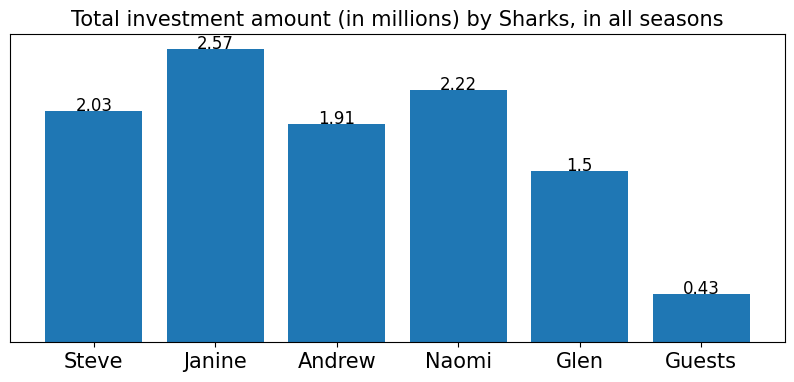

In [38]:
# Amount Invested by sharks
Amount = [(shark_tank['Steve Investment Amount']/1000000).sum(), (shark_tank['Janine Investment Amount']/1000000).sum(), (shark_tank['Andrew Investment Amount']/1000000).sum(), (shark_tank['Naomi Investment Amount']/1000000).sum(),
    (shark_tank['Glen Investment Amount']/1000000).sum(), (shark_tank['Guest Investment Amount']/1000000).sum()]
name=['Steve','Janine','Andrew','Naomi','Glen','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total investment amount (in millions) by Sharks, in all seasons", fontsize=15)
plt.show()

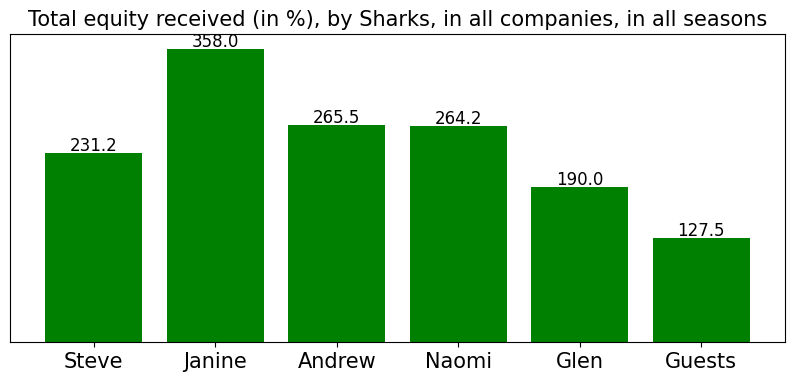

In [39]:
# Equity received by sharks, in all seasons
Equity = [shark_tank['Steve Investment Equity'].sum(), shark_tank['Janine Investment Equity'].sum(), shark_tank['Andrew Investment Equity'].sum(), shark_tank['Naomi Investment Equity'].sum(),
    shark_tank['Glen Investment Equity'].sum(), shark_tank['Guest Investment Equity'].sum()]
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'], color='g')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total equity received (in %), by Sharks, in all companies, in all seasons", fontsize=15)
plt.show()

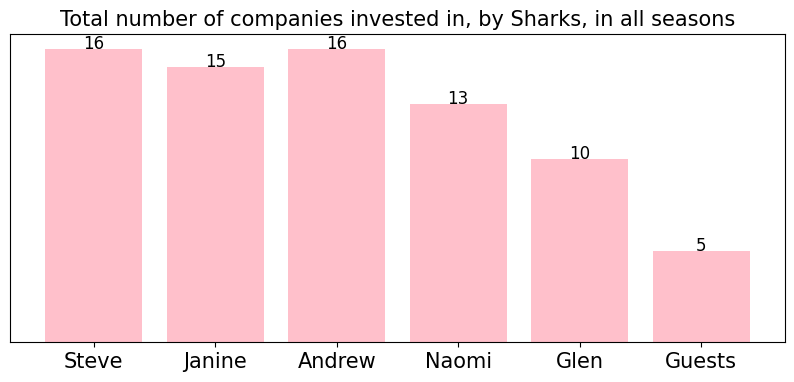

In [40]:
# Number of companies invested
Amount = [(shark_tank['Steve Investment Amount']).count(), (shark_tank['Janine Investment Amount']).count(), (shark_tank['Andrew Investment Amount']).count(), (shark_tank['Naomi Investment Amount']).count(),
    (shark_tank['Glen Investment Amount']).count(), (shark_tank['Guest Investment Amount']).count()]
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'], color='pink')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total number of companies invested in, by Sharks, in all seasons", fontsize=15)
plt.show()

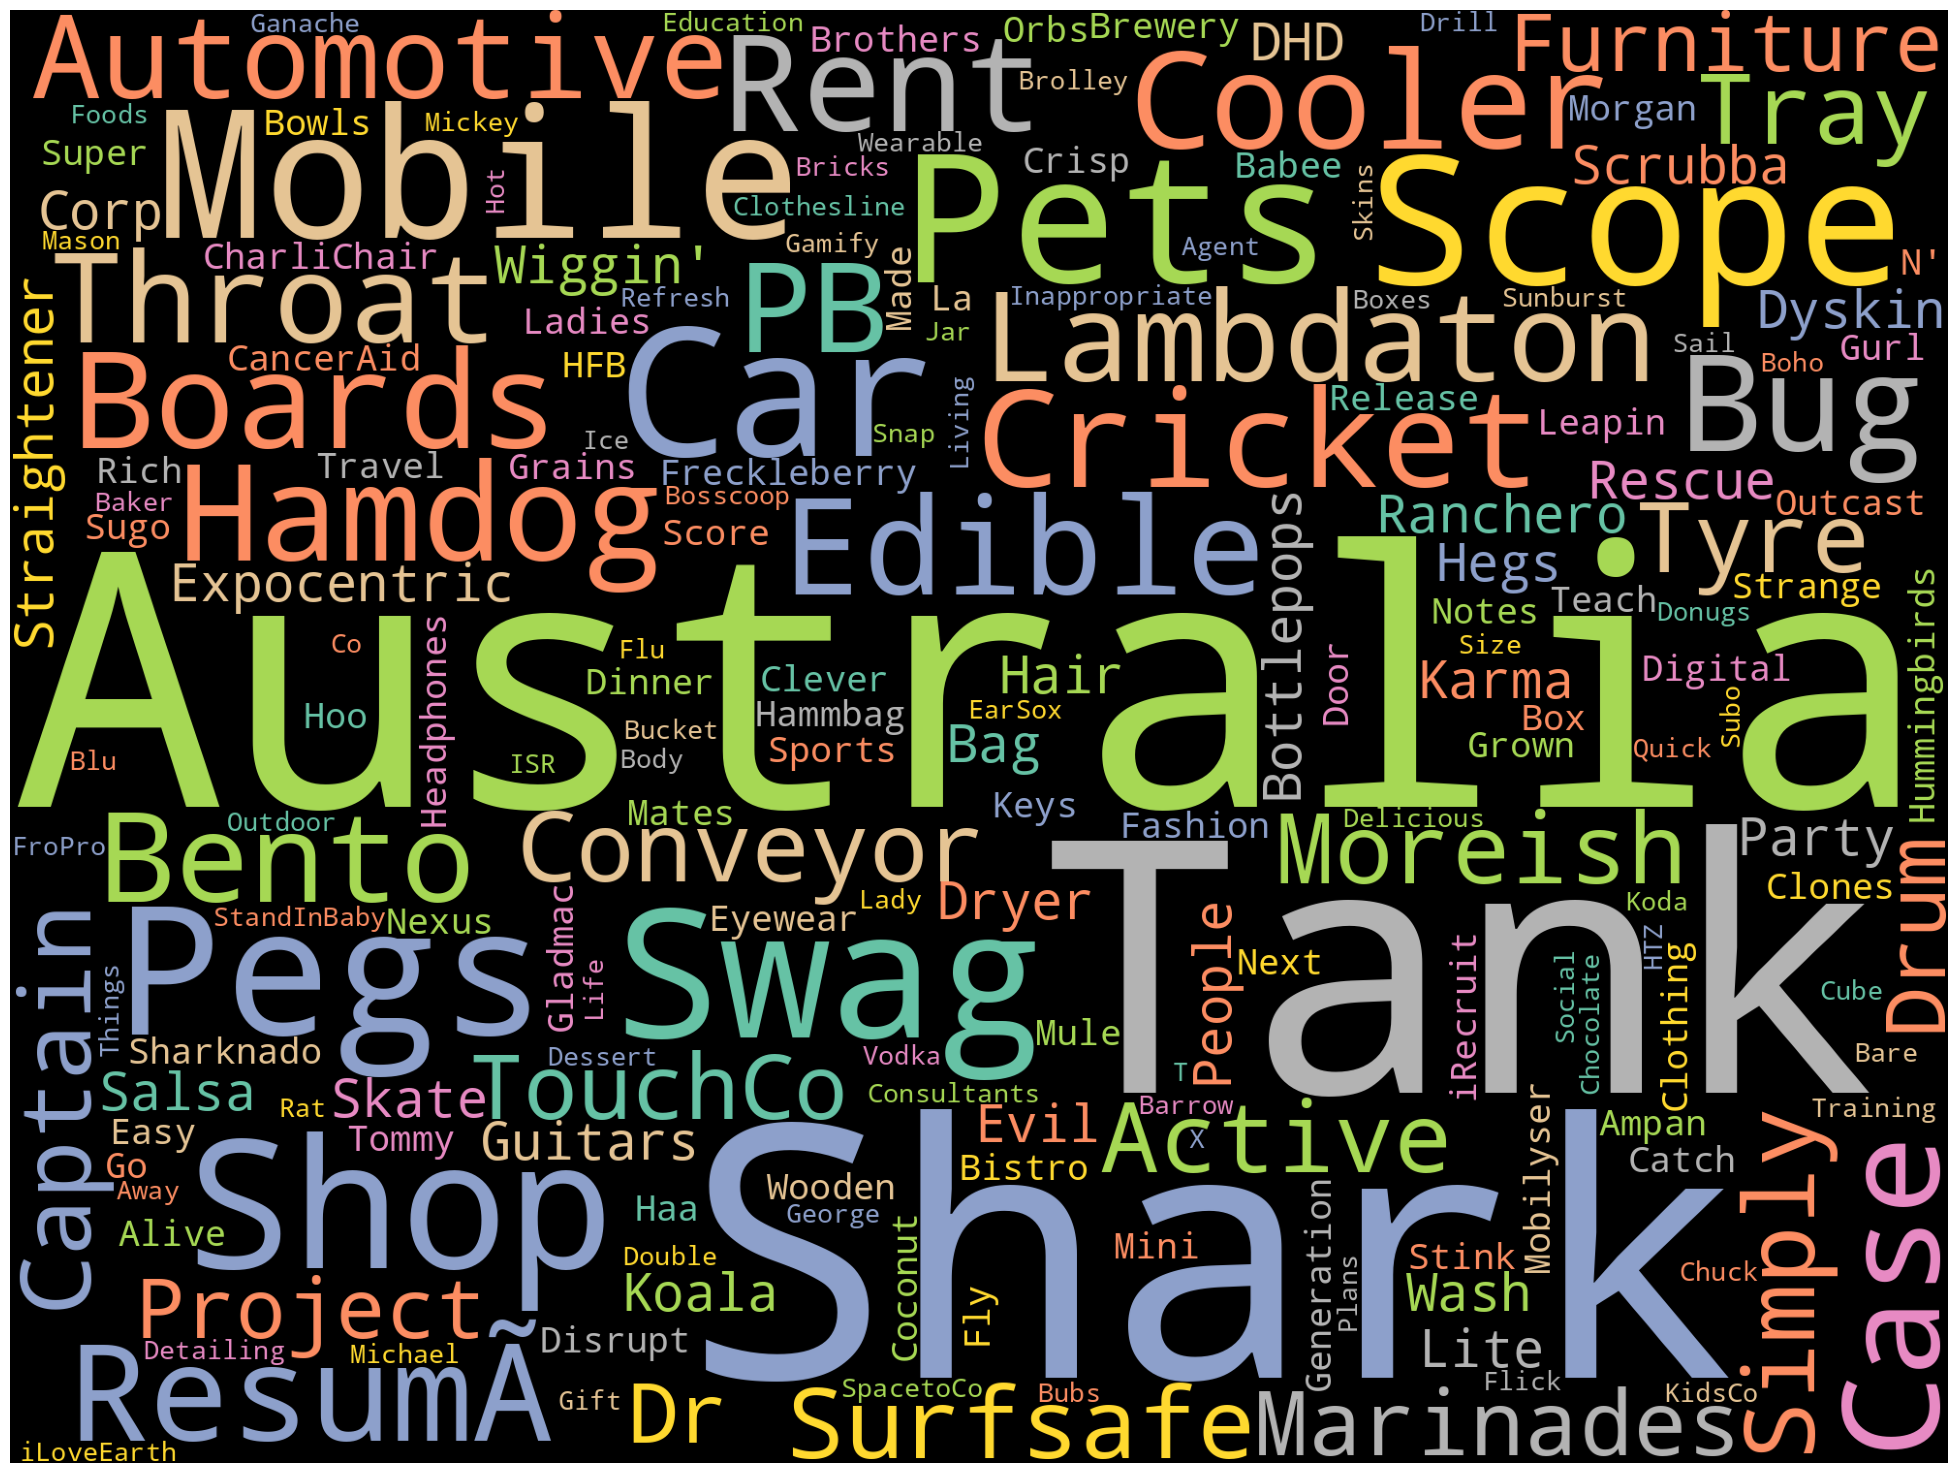

In [41]:
# Word cloud based on Startup Names, in all seasons
text = " Shark Tank Australia ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2024).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [42]:
# # Word cloud based on Startup Names, in current/latest season (5th season)
# text = " Shark Tank Australia ".join(cat for cat in shark_tank_recent['Startup Name'])
# stop_words = list(STOPWORDS)
# wordcloud = WordCloud(width=1600, height=1200, stopwords=stop_words, background_color='black', colormap='Set3', collocations=False, random_state=2024).generate(text)
# plt.figure(figsize=(18,15))
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()

## 🔎 Shark Tank India Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-india

## 🔥Steve's Investments

Total investments by Steve  16
Investment amount by Steve A$2,025,833.33
Equity received by Steve 231.2 % in different companies

Company details:
------------------------------------------------------------------------------------------
    Startup Name                Industry  Steve Investment Amount
    Throat Scope         Health/Wellness              76000.00000
Mobile Tyre Shop                     nan              75000.00000
     Rescue Swag                     nan             100000.00000
Scrubba Wash Bag                     nan             180000.00000
      Bottlepops                     nan              75000.00000
    Hummingbirds                     nan              40000.00000
On The Go Sports Fitness/Sports/Outdoors             200000.00000
 Sharknado Alive                     nan              95000.00000
   Car Next Door           Software/Tech             300000.00000
         My Cube                     nan             200000.00000
       Koda Sail       Business Serv

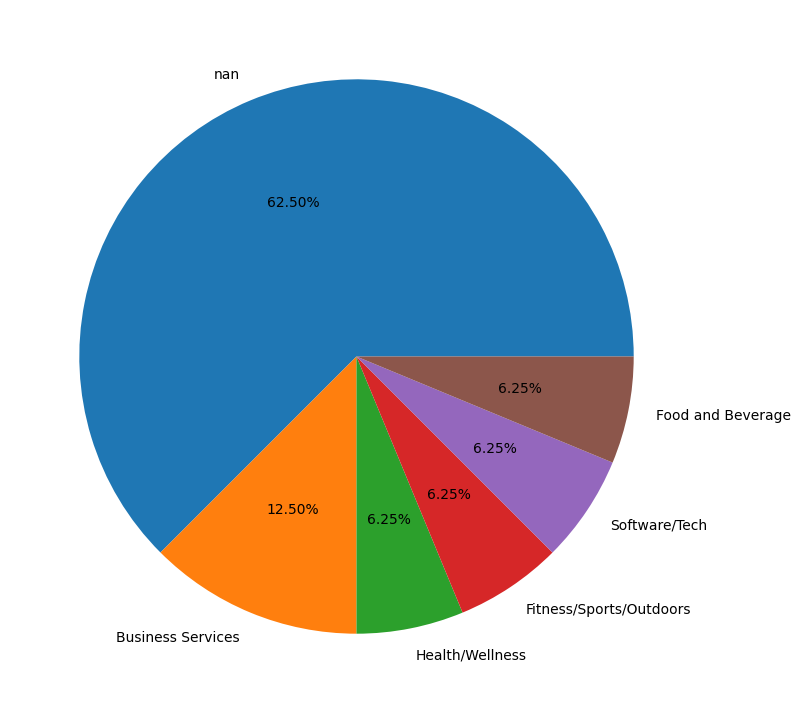

In [43]:
print("Total investments by Steve", shark_tank[shark_tank['Steve Investment Amount']>0][['Steve Investment Amount']].count().to_string()[-3:])
print("Investment amount by Steve", format_currency(shark_tank['Steve Investment Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))
print("Equity received by Steve", round(shark_tank['Steve Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Steve Investment Amount']>0][["Startup Name","Industry","Steve Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nSteve industry wise investments\n")
print(shark_tank[shark_tank['Steve Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Steve Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Steve Investment Amount']>0] [["Startup Name","Steve Investment Amount","Steve Investment Equity"]].sort_values(by="Steve Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Steve Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎇 Janine's Investments

Total investments by Janine  15
Investment amount by Janine A$2,571,000
Equity received by Janine 358.0 % in different companies

Company details:
------------------------------------------------------------------------------------------
              Startup Name                Industry  Janine Investment Amount
               Case Boards             Electronics                   20000.0
           Edible Bug Shop       Business Services                  170000.0
          Scrubba Wash Bag                     nan                  180000.0
                Tommy Sugo                     nan                  350000.0
         The Dinner Ladies                     nan                  216000.0
Fly Babee Travel Made Easy                     nan                   80000.0
          On The Go Sports Fitness/Sports/Outdoors                  200000.0
           Sharknado Alive                     nan                   95000.0
     Her Fashion Box (HFB)          Fashion/Beauty                  1

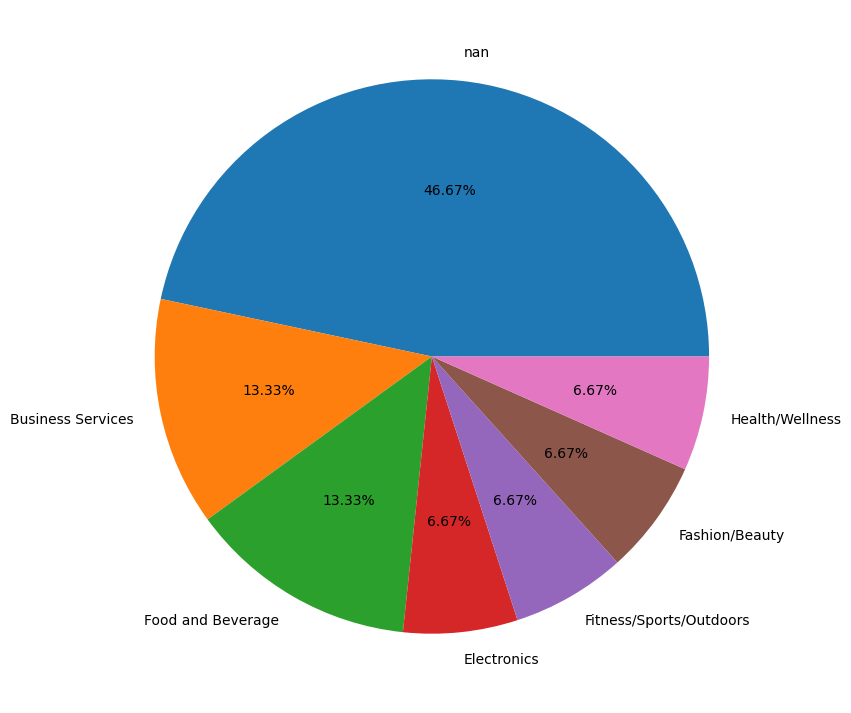

In [44]:
print("Total investments by Janine", shark_tank[shark_tank['Janine Investment Amount']>0][['Janine Investment Amount']].count().to_string()[-3:])
print("Investment amount by Janine", format_currency(shark_tank['Janine Investment Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))
print("Equity received by Janine", round(shark_tank['Janine Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Janine Investment Amount']>0][["Startup Name","Industry","Janine Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nJanine industry wise investments\n")
print(shark_tank[shark_tank['Janine Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Janine Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Janine Investment Amount']>0] [["Startup Name","Janine Investment Amount","Janine Investment Equity"]].sort_values(by="Janine Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Janine Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## ✳️ Andrew's Investments

Total investments by Andrew  16
Investment amount by Andrew A$1,914,850.33
Equity received by Andrew 265.5 % in different companies

Company details:
------------------------------------------------------------------------------------------
         Startup Name                Industry  Andrew Investment Amount
          Case Boards             Electronics               20000.00000
               Hamdog       Food and Beverage                   2.00000
           Bottlepops                     nan               75000.00000
     On The Go Sports Fitness/Sports/Outdoors              200000.00000
      Sharknado Alive                     nan               95000.00000
Her Fashion Box (HFB)          Fashion/Beauty              100000.00000
            CancerAid         Health/Wellness              250000.00000
   Hoo Haa Headphones             Electronics                  15.00000
        Coconut Bowls       Food and Beverage              150000.00000
          StandInBaby      Children/Edu

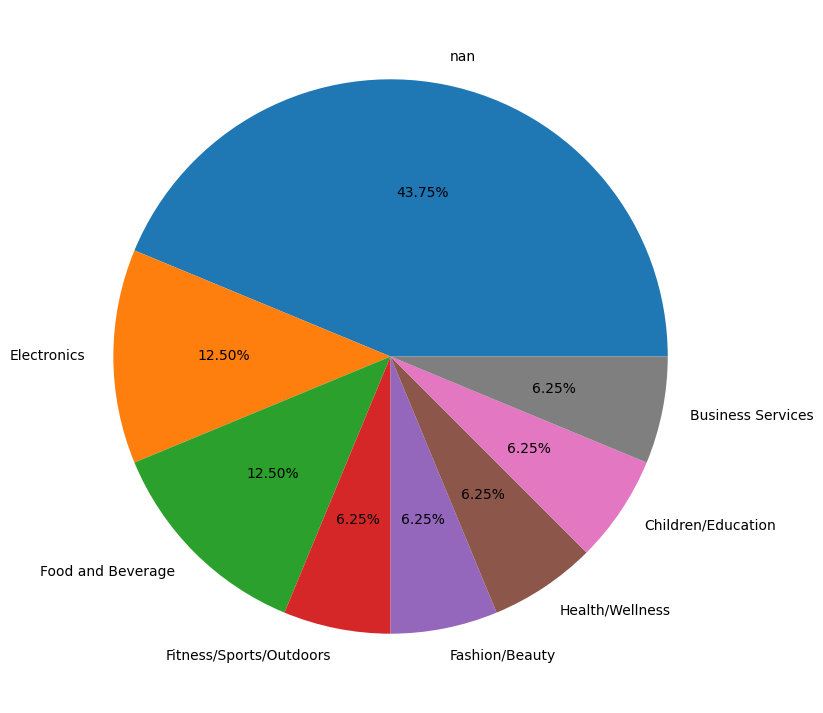

In [45]:
print("Total investments by Andrew", shark_tank[shark_tank['Andrew Investment Amount']>0][['Andrew Investment Amount']].count().to_string()[-3:])
print("Investment amount by Andrew", format_currency(shark_tank['Andrew Investment Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))
print("Equity received by Andrew", round(shark_tank['Andrew Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Andrew Investment Amount']>0][["Startup Name","Industry","Andrew Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nAndrew industry wise investments\n")
print(shark_tank[shark_tank['Andrew Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Andrew Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Andrew Investment Amount']>0] [["Startup Name","Andrew Investment Amount","Andrew Investment Equity"]].sort_values(by="Andrew Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Andrew Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🚀 Naomi's Investments

Total investments by Naomi  13
Investment amount by Naomi A$2,215,015
Equity received by Naomi 264.2 % in different companies

Company details:
------------------------------------------------------------------------------------------
              Startup Name                Industry  Naomi Investment Amount
            Cricket Cooler Fitness/Sports/Outdoors                 280000.0
                 Hegs Pegs                     nan                 380000.0
      Grown Wooden Eyewear                     nan                  30000.0
           Sharknado Alive                     nan                  95000.0
            Strange Grains       Food and Beverage                 350000.0
        Hoo Haa Headphones             Electronics                     15.0
The Inappropriate Gift Co.          Lifestyle/Home                 250000.0
             Dessert Boxes       Food and Beverage                 300000.0
                    Donugs       Food and Beverage                 100000.0
   Su

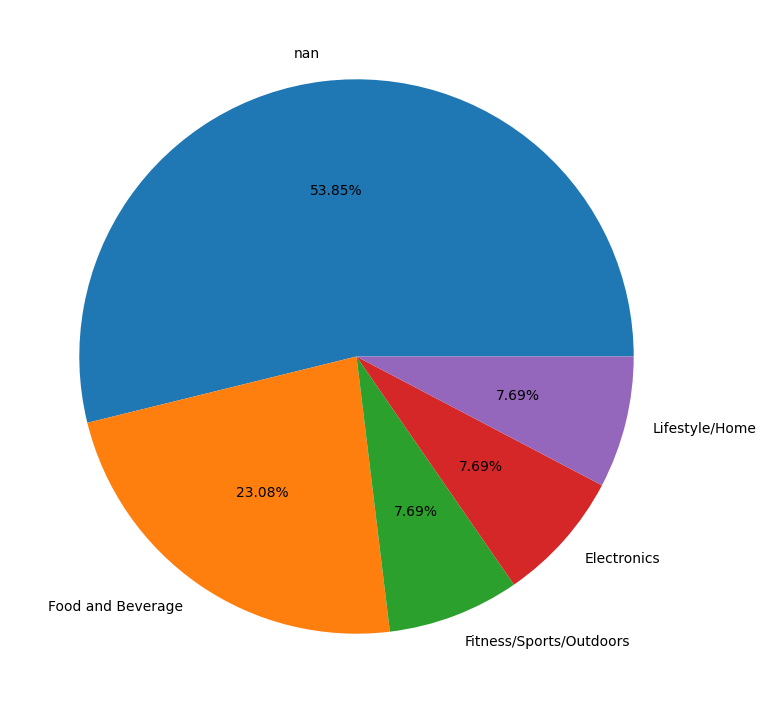

In [46]:
print("Total investments by Naomi", shark_tank[shark_tank['Naomi Investment Amount']>0][['Naomi Investment Amount']].count().to_string()[-3:])
print("Investment amount by Naomi", format_currency(shark_tank['Naomi Investment Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))
print("Equity received by Naomi", round(shark_tank['Naomi Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Naomi Investment Amount']>0][["Startup Name","Industry","Naomi Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nNaomi industry wise investments\n")
print(shark_tank[shark_tank['Naomi Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Naomi Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Naomi Investment Amount']>0] [["Startup Name","Naomi Investment Amount","Naomi Investment Equity"]].sort_values(by="Naomi Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Naomi Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎾 Glen's Investments

Total investments by Glen  10
Investment amount by Glen A$1,497,333.33
Equity received by Glen 190.0 % in different companies

Company details:
------------------------------------------------------------------------------------------
   Startup Name           Industry  Glen Investment Amount
Sharknado Alive                nan             95000.00000
      CancerAid    Health/Wellness            250000.00000
    StandInBaby Children/Education            100000.00000
   ISR Training  Business Services             62333.33333
         KidsCo                nan            375000.00000
    Bare + Boho                nan             85000.00000
       The Swag                nan            150000.00000
The Mason Baker                nan             50000.00000
         FroPro                nan            250000.00000
       Hex Pegs                nan             80000.00000
------------------------------------------------------------------------------------------

Glen industry wise inves

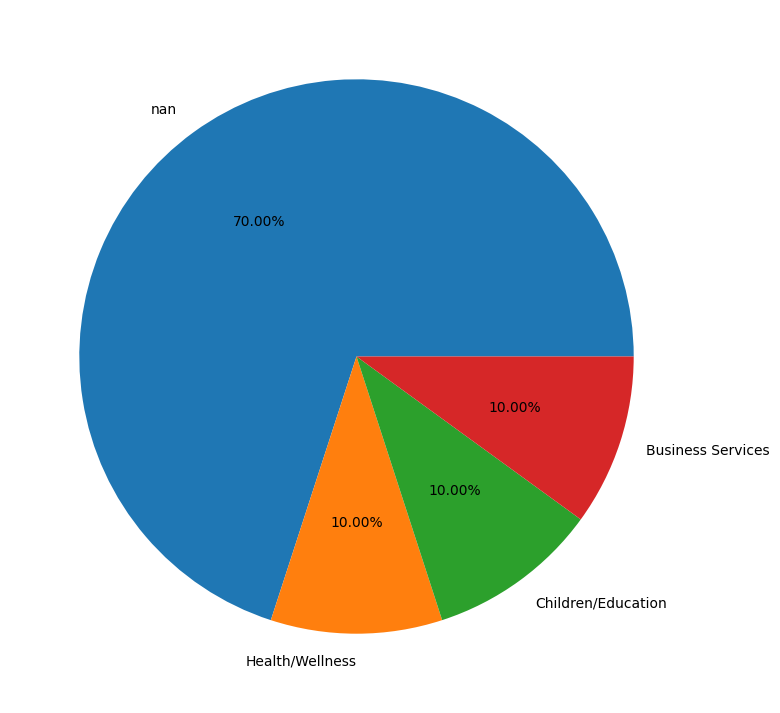

In [47]:
print("Total investments by Glen", shark_tank[shark_tank['Glen Investment Amount']>0][['Glen Investment Amount']].count().to_string()[-3:])
print("Investment amount by Glen", format_currency(shark_tank['Glen Investment Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))
print("Equity received by Glen", round(shark_tank['Glen Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Glen Investment Amount']>0][["Startup Name","Industry","Glen Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nGlen industry wise investments\n")
print(shark_tank[shark_tank['Glen Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Glen Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Glen Investment Amount']>0] [["Startup Name","Glen Investment Amount","Glen Investment Equity"]].sort_values(by="Glen Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Glen Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎆 All Guest's Investments

Total investments by all Guests  5
Investment amount by all Guests A$425,000
Equity received by all Guests 127.5 % in different companies

Company details:
--------------------------------------------------------------------------------------------
        Startup Name          Industry  Guest Investment Amount Guest Name
    Mobile Tyre Shop               nan                  75000.0       John
      Salsa Ranchero Food and Beverage                  80000.0       John
        Hummingbirds               nan                  40000.0       John
         CharliChair               nan                 200000.0       John
Grown Wooden Eyewear               nan                  30000.0       John
--------------------------------------------------------------------------------------------

All Guests industry wise investments

Industry
nan                  4
Food and Beverage    1
Name: count, dtype: int64


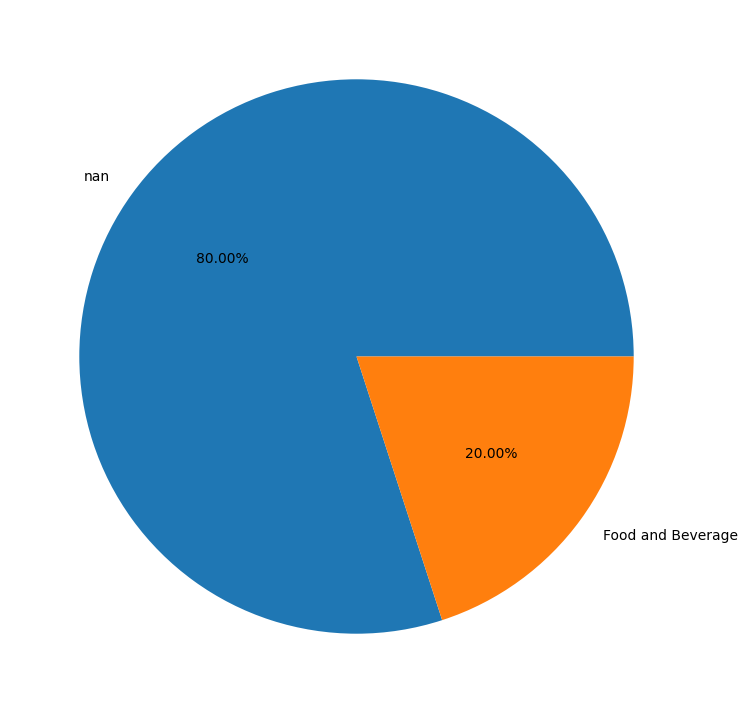

In [48]:
print("Total investments by all Guests", shark_tank[shark_tank['Guest Investment Amount']>0][['Guest Investment Amount']].count().to_string()[-2:])
print("Investment amount by all Guests", format_currency(shark_tank['Guest Investment Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))
print("Equity received by all Guests", round(shark_tank['Guest Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*92)
print(shark_tank.loc[shark_tank['Guest Investment Amount']>0][["Startup Name","Industry","Guest Investment Amount","Guest Name"]].to_string(index=False))
print('-'*92)

print("\nAll Guests industry wise investments\n")
print(shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Guest Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

In [49]:
# Guest sharks who invested in most number of companies
shark_tank.loc[shark_tank['Guest Investment Amount'] > 1].groupby('Guest Name').size().nlargest(10)

Guest Name
John    5
dtype: int64

In [50]:
# Investment amount by guests, in Millions
round(shark_tank.groupby(["Guest Name"])["Guest Investment Amount"].sum().sort_values(ascending=False)/1000000,2)

Guest Name
John    0.42
Name: Guest Investment Amount, dtype: float64

Number of Sharks in Deal
1.0    34
2.0    16
3.0     2
5.0     1
Name: count, dtype: int64 

Number of Sharks in Deal
1.0    64%
2.0    30%
3.0     4%
5.0     2%
Name: proportion, dtype: object


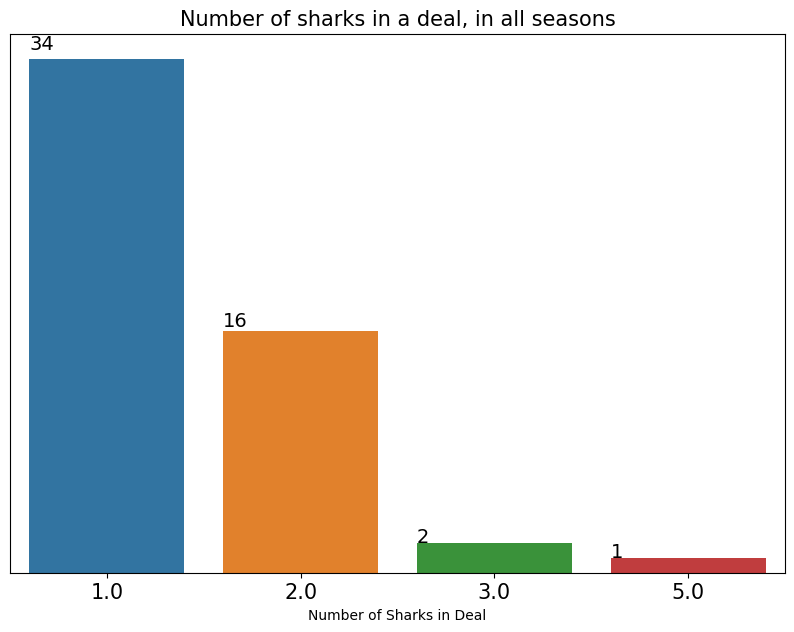

In [51]:
# Number of sharks in a deal, in all seasons
print(shark_tank['Number of Sharks in Deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of Sharks in Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(10, 7))
plt.title("Number of sharks in a deal, in all seasons", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = shark_tank, x = 'Number of Sharks in Deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [52]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of Sharks in Deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

    Season Number     Startup Name  Total Deal Amount  Total Deal Equity
49              2  Sharknado Alive           475000.0               50.0


In [53]:
# Sharks with most number of solo deals
amt_cols = shark_tank.columns[shark_tank.columns.str.contains(' Investment Amount')].tolist()
tmp = shark_tank.loc[shark_tank['Number of Sharks in Deal'] == 1][amt_cols]
tmp.count().sort_values(ascending=False).nlargest(3)

# MarkCuban did most number of solo deals, than any other Shark

Naomi Investment Amount     9
Janine Investment Amount    7
Steve Investment Amount     6
dtype: int64

In [54]:
# Sharks with most number of episode presence, in all seasons
present_cols = shark_tank.columns[shark_tank.columns.str.endswith(' Present')].tolist()
tmp = shark_tank[present_cols]
tmp.sum().sort_values(ascending=False).nlargest(3)

# Kevin was there in most number of episodes

Steve Present     113.0
Janine Present    113.0
Andrew Present    113.0
dtype: float64

In [55]:
# # Top 25 Australia 🇺🇸 states of pitcher's
# tmp = shark_tank['Pitchers State'].value_counts().nlargest(20).sort_values(ascending=True)
# fig = px.bar(tmp, x=tmp.values, title="<b>Top 20 States</b> from where pitchers came from", template='simple_white', text=tmp, width=850, height=750)
# fig.update_yaxes(title_text="")
# fig.update_xaxes(visible=False)
# fig.show()

In [56]:
# # Top 20 Australia cities
# tmp = shark_tank['Pitchers City'].value_counts().nlargest(20).sort_values(ascending=True)
# fig = px.bar(tmp, x=tmp.values, title="<b>Top 20 USA cities</b> with number of startups came for pitching", template='simple_white', text=tmp, width=850, height=800)
# fig.update_yaxes(title_text="")
# fig.update_xaxes(visible=False)
# fig.show()

In [57]:
# Most frequently asked amount, by startups
shark_tank.groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (AUD) and Number times asked

Original Ask Amount
200000    15
250000     9
300000     9
50000      8
100000     6
500000     6
350000     4
60000      3
80000      3
90000      3
dtype: int64

In [58]:
# Most frequently offered equity, by startups
shark_tank.groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number times offered

Original Offered Equity
20.0    29
10.0    28
25.0    12
15.0     8
5.0      7
30.0     4
40.0     4
12.0     3
18.0     2
33.0     2
dtype: int64

In [59]:
# ✅ Most frequently invested amount, by Sharks
shark_tank.groupby('Total Deal Amount').size().nlargest(10)

# Sharks mostly invested more than 100K per deal

# Total Deal Amount (AUD) and Number times invested

Total Deal Amount
100000.0    6
200000.0    6
80000.0     4
250000.0    4
300000.0    4
150000.0    3
40000.0     2
350000.0    2
380000.0    2
600000.0    2
dtype: int64

In [60]:
# ✅ Most frequently received total equity, by Sharks
shark_tank.groupby('Total Deal Equity').size().nlargest(10)

# Sharks are expecting more than 20% equity, in a deal

# Total Deal Equity (in %) and Number times invested

Total Deal Equity
30.0    10
25.0     9
40.0     6
20.0     5
50.0     5
10.0     2
12.0     2
16.0     2
33.0     2
4.0      1
dtype: int64

In [61]:
# Most frequently asked amount, deals received % and not received %?
tmp2 = pd.crosstab(shark_tank['Original Ask Amount'], shark_tank['Received Offer']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=False)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

# Most frequently asked Deal Amount (in AUD) and % of deal received and not received

deal_percentage  no_deal_percentage
200000             67.0                33.0
250000             67.0                33.0
300000             67.0                33.0
100000             83.0                17.0
80000              67.0                33.0
350000             50.0                50.0
20000             100.0                 0.0
50000              25.0                75.0
60000              67.0                33.0
500000             33.0                67.0

In [62]:
# Most frequently asked equity, deals received % and not received %?
tmp2 = pd.crosstab(shark_tank['Original Offered Equity'], shark_tank['Received Offer']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=False)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

# Most frequently Offered Equity (in %) and % of deal received and not received

deal_percentage  no_deal_percentage
10.0             86.0                14.0
20.0             48.0                52.0
25.0             42.0                58.0
5.0              57.0                43.0
15.0             50.0                50.0
40.0             50.0                50.0
12.0             67.0                33.0
30.0             50.0                50.0
14.0            100.0                 0.0
50.0             50.0                50.0

In [63]:
# Mostly successful combinations (of asked amount and offered equity)
shark_tank.loc[shark_tank['Accepted Offer'] == 1].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)

# If you are pitching in Australian Shark Tank, ask for 250K-300K with 10% equity ✅

Original Ask Amount  Original Offered Equity
300000               10.0                       5
250000               10.0                       3
20000                10.0                       2
80000                20.0                       2
100000               10.0                       2
                     20.0                       2
200000               5.0                        2
                     20.0                       2
1                    25.0                       1
20                   20.0                       1
dtype: int64

In [64]:
# Most frequently asked amount, by startups who could NOT get a deal
shark_tank.loc[shark_tank['Received Offer'] == 0].groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (AUD) and Number times asked (but rejected by sharks) ❌

Original Ask Amount
50000      6
200000     5
500000     4
250000     3
300000     3
90000      2
350000     2
1000000    2
2500000    2
36000      1
dtype: int64

In [65]:
# Most frequently offered equity, by startups who could NOT get a deal
shark_tank.loc[shark_tank['Received Offer'] == 0].groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number times offered (but rejected by sharks) ❌

Original Offered Equity
20.0    15
25.0     7
10.0     4
15.0     4
5.0      3
18.0     2
30.0     2
40.0     2
2.2      1
3.0      1
dtype: int64

In [66]:
# Mostly rejected combinations (of asked amount and offered equity)
shark_tank.loc[shark_tank['Received Offer'] == 0].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)

# If you are pitching in Shark Tank US, don't ask for 100K with 10%/20% equity or 500K with 5% equity 🔴

Original Ask Amount  Original Offered Equity
50000                20.0                       3
36000                18.0                       1
45000                15.0                       1
50000                5.0                        1
                     10.0                       1
                     25.0                       1
60000                15.0                       1
70000                20.0                       1
75000                3.0                        1
80000                20.0                       1
dtype: int64

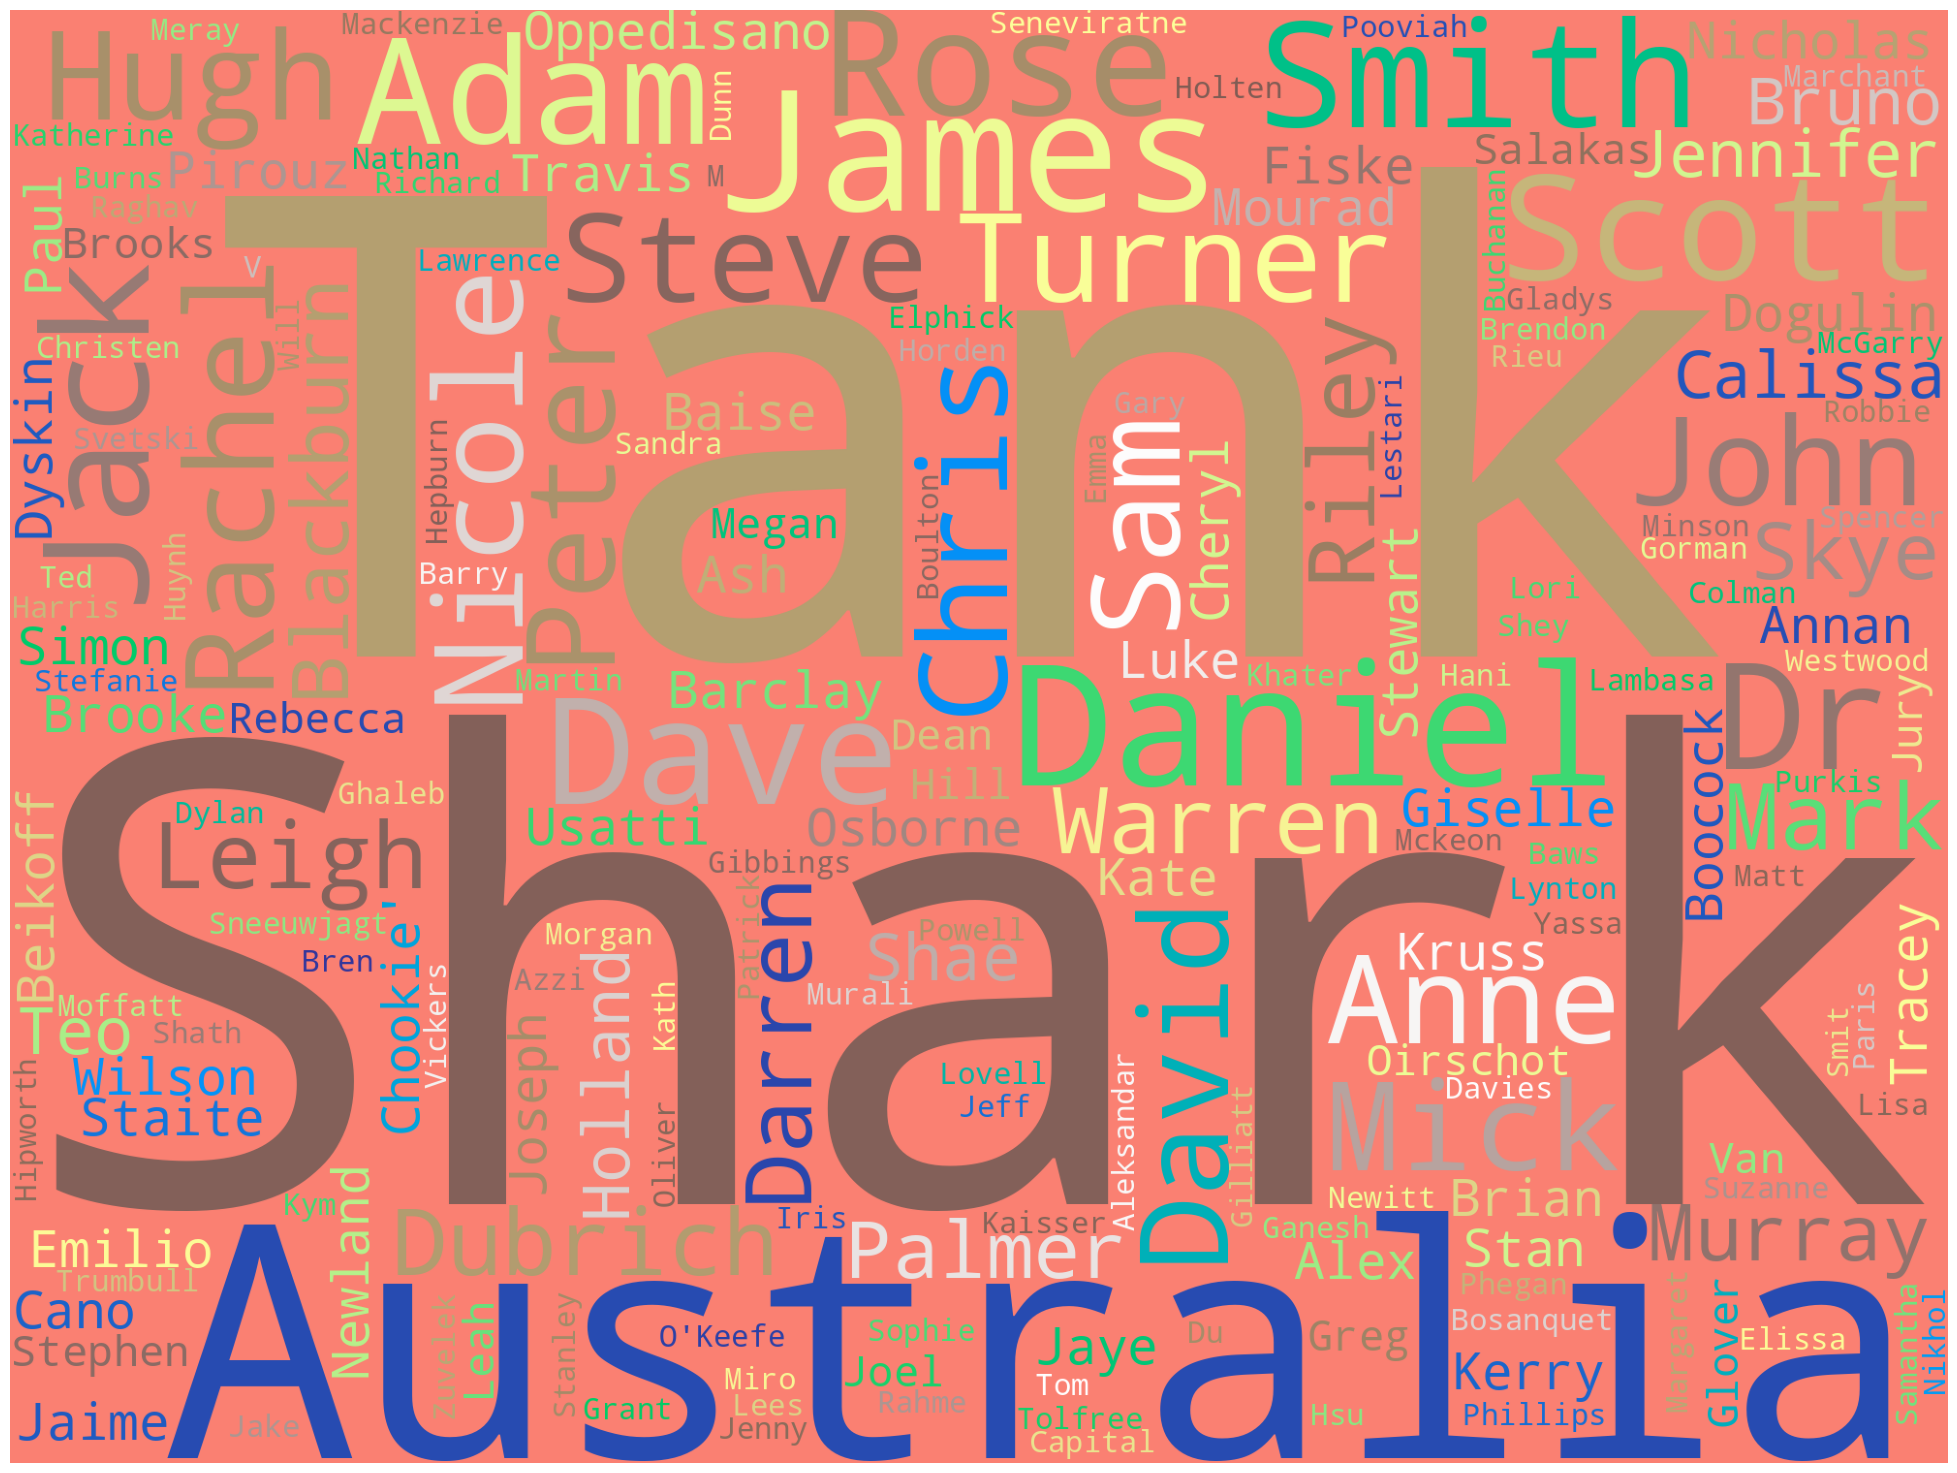

In [67]:
# Word cloud based on Pitcher name
text = " Shark Tank Australia ".join(cat for cat in shark_tank['Entrepreneur Names'].astype(str))
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='terrain_r', collocations=False, random_state=2024).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [68]:
# Many (11) companies got more amount than they asked/expected
print(shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount"]]

Startup Name    11
dtype: int64


Season Number                Startup Name  Original Ask Amount  \
2               1                 Case Boards                20000   
3               1                      Hamdog                    1   
18              1              Salsa Ranchero                60000   
24              1            Scrubba Wash Bag               178000   
38              1           The Dinner Ladies               140000   
46              1  Fly Babee Travel Made Easy                50000   
47              2            On The Go Sports               300000   
61              3          Hoo Haa Headphones                   20   
65              4  The Inappropriate Gift Co.               100000   
77              4                ISR Training               125000   
96              4             The Mason Baker                50000   

    Total Deal Amount  
2             40000.0  
3                 2.0  
18            80000.0  
24           360000.0  
38           216000.0  
46            80000.0  
47           600000.0  
61               30.0  
65           250000.0  
77           187000.0  
96           100000.0

In [69]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Offered Equity'] < shark_tank["Total Deal Equity"]][["Season Number","Startup Name","Original Offered Equity","Total Deal Equity"]]

Season Number                Startup Name  Original Offered Equity  \
2                1                 Case Boards                     10.0   
3                1                      Hamdog                     25.0   
4                1             Edible Bug Shop                     20.0   
6                1                Throat Scope                     10.0   
18               1              Salsa Ranchero                     30.0   
20               1                 Rescue Swag                     20.0   
22               1                   Hegs Pegs                     10.0   
24               1            Scrubba Wash Bag                      8.0   
31               1                Hummingbirds                     20.0   
32               1                  Tommy Sugo                     15.0   
36               1                 CharliChair                      5.0   
39               1        Grown Wooden Eyewear                     20.0   
46               1  Fly Babee Travel Made Easy                     10.0   
47               2            On The Go Sports                     10.0   
53               2       Her Fashion Box (HFB)                     12.0   
57               3              Strange Grains                     10.0   
60               3           Catch 'N' Release                     20.0   
61               3          Hoo Haa Headphones                     20.0   
62               4               Coconut Bowls                     10.0   
65               4  The Inappropriate Gift Co.                     10.0   
66               4               Dessert Boxes                     10.0   
67               4                  The T Lady                     10.0   
69               4                     My Cube                      5.0   
72               4             The Quick Flick                     10.0   
74               4                   Koda Sail                     10.0   
76               4                      Donugs                     20.0   
77               4                ISR Training                     20.0   
79               4   Delicious Foods Australia                     10.0   
86               4     Sunburst Outdoor Living                     20.0   
89               4                      KidsCo                     15.0   
92               4              Bricks + Agent                     10.0   
95               4                    The Swag                     10.0   
96               4             The Mason Baker                     15.0   
99               4               Things 4 Bubs                     25.0   
100              4                 Snap Social                     20.0   
101              4                      FroPro                     10.0   
103              4                   SpacetoCo                     14.0   
107              4                    Hex Pegs                     20.0   
109              4                  Birth Beat                     10.0   
110              4                Pod & Parcel                     15.0   

     Total Deal Equity  
2                 35.0  
3                 50.0  
4                 50.0  
6                 30.0  
18                40.0  
20                40.0  
22                15.0  
24                30.0  
31                25.0  
32                50.0  
36                50.0  
39                40.0  
46                38.0  
47                30.0  
53                16.0  
57                25.0  
60               100.0  
61                30.0  
62                18.0  
65                25.0  
66                12.0  
67                20.0  
69                12.5  
72                27.5  
74                25.0  
76                25.0  
77                30.0  
79                25.0  
86                30.0  
89                25.0  
92                16.0  
95                25.0  
96                30.0  
99                30.0  
100               33.0  
101               20.0  
103 

In [70]:
# Below (15) companies got the same valuation they requested (with or without loan)
print(shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    15
dtype: int64


Season Number                Startup Name  Valuation Requested  \
0                1              Cricket Cooler              1400000   
3                1                      Hamdog                    4   
18               1              Salsa Ranchero               200000   
49               2             Sharknado Alive               950000   
51               2               Car Next Door              7500000   
54               3                   CancerAid              5000000   
61               3          Hoo Haa Headphones                  100   
65               4  The Inappropriate Gift Co.              1000000   
68               4                 StandInBaby              1000000   
78               4                        Subo              1000000   
82               4           Ganache Chocolate              1500000   
88               4                The Bosscoop               100000   
91               4                 Bare + Boho               283333   
96               4             The Mason Baker               333333   
112              4                        QPay              4523810   

     Deal Valuation  
0         1400000.0  
3               4.0  
18         200000.0  
49         950000.0  
51        7500000.0  
54        5000000.0  
61            100.0  
65        1000000.0  
68        1000000.0  
78        1000000.0  
82        1500000.0  
88         100000.0  
91         283333.0  
96         333333.0  
112       4523810.0

In [71]:
# There are 1 companies which got more valuation than they pitched
print(shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    1
dtype: int64


Season Number       Startup Name  Valuation Requested  Deal Valuation
38              1  The Dinner Ladies               424242        654545.0

In [72]:
# Episodes which got most TRP
print("Maximum SharkTank viewership in AU:", shark_tank['Viewers'].max(), "\n")
print(shark_tank.loc[shark_tank['Viewers']>=shark_tank['Viewers'].max()-240000][["Season Number","Episode Number","Startup Name","Viewers"]].head(12).sort_values("Viewers",ascending=False).to_string(index=False))

Maximum SharkTank viewership in AU: 973000 

 Season Number  Episode Number             Startup Name  Viewers
             1               6         Scrubba Wash Bag   973000
             1               6                   K-Lite   973000
             1               6                Evil Corp   973000
             1               6               Bottlepops   973000
             3               1                CancerAid   749000
             3               1              Mini Clones   749000
             3               1                 iRecruit   749000
             1               3                 Surfsafe   739000
             1               3           Captain Active   739000
             1               3         Mobile Tyre Shop   739000
             1               3 Simply Moreish Marinades   739000
             1               3                  TouchCo   739000


In [73]:
# Episodes which got least TRP
print("Minimum SharkTank viewership in AU:", shark_tank['Viewers'].min(), "\n")
print(shark_tank.loc[shark_tank['Viewers']<=shark_tank['Viewers'].min()+100000][["Season Number","Episode Number","Startup Name","Viewers"]].head(12).sort_values("Viewers").to_string(index=False))

Minimum SharkTank viewership in AU: 371000 

 Season Number  Episode Number          Startup Name  Viewers
             4              13            Birth Beat   371000
             4              13          Pod & Parcel   371000
             4              13      The Seek Society   371000
             4              13                  QPay   371000
             4              12         Frontier Pets   440000
             4              12   Wrinkles Schminkles   440000
             4              12              Hex Pegs   440000
             4              12        Minnow Designs   440000
             2               2               Disrupt   449000
             2               2         Car Next Door   449000
             2               2            Super Orbs   449000
             2               2 Her Fashion Box (HFB)   449000


Multiple Entrepreneurs
0    68
1    45
Name: count, dtype: Int64 

Multiple Entrepreneurs
0    60%
1    40%
Name: proportion, dtype: object


<Axes: ylabel='count'>

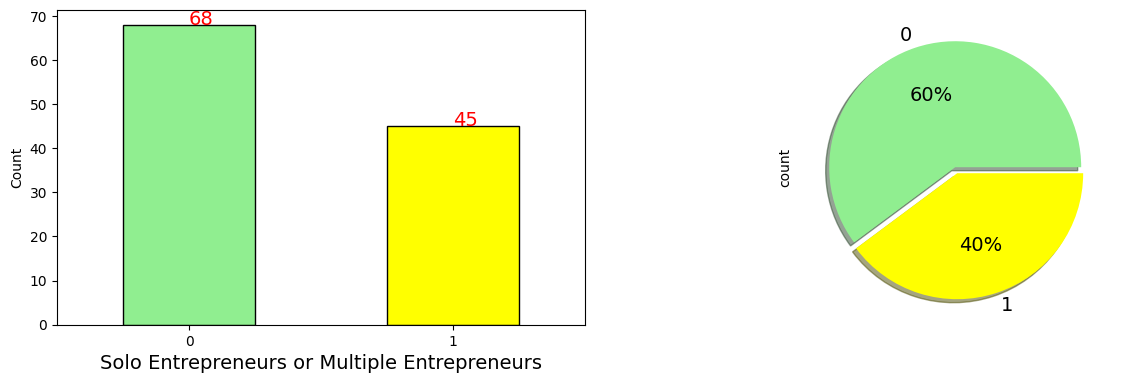

In [74]:
# Solo or multiple Entrepreneurs ?
print(shark_tank['Multiple Entrepreneurs'].value_counts(), "\n")
print(round(shark_tank['Multiple Entrepreneurs'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Multiple Entrepreneurs"].value_counts().plot(kind='bar', color=["lightgreen","yellow"], ec="k")
plt.xlabel("Solo Entrepreneurs or Multiple Entrepreneurs", size=14)
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Multiple Entrepreneurs"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="red")
    
ax2 = plt.subplot(222)
shark_tank["Multiple Entrepreneurs"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["lightgreen","yellow"], shadow=True, fontsize=14)

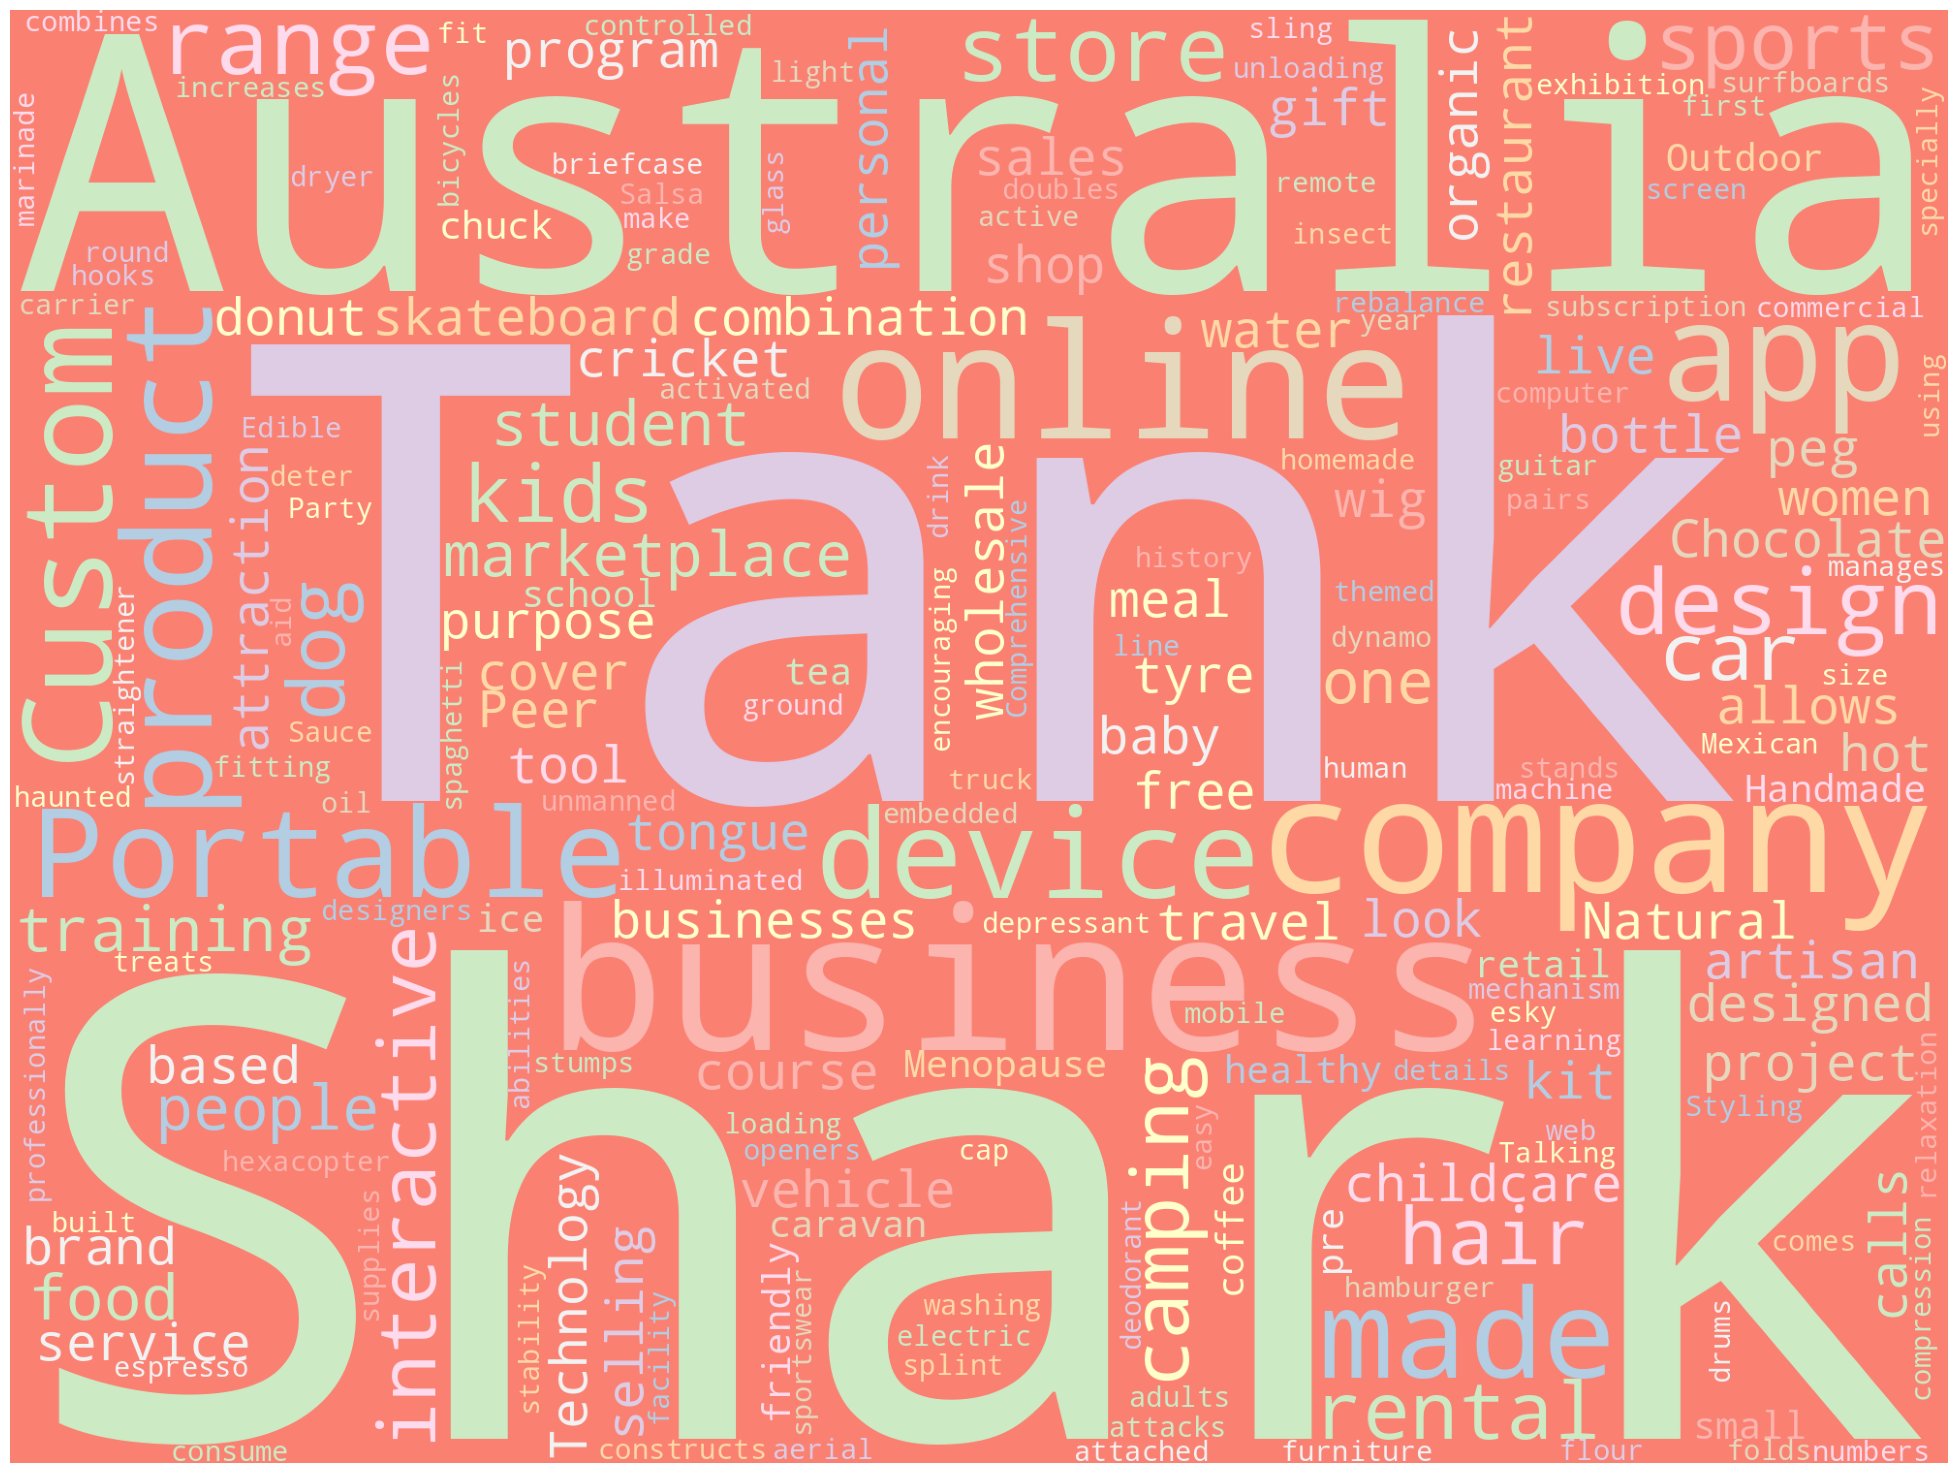

In [75]:
# Word cloud based on Business Description of startups came in all seasons
text = " Shark Tank Australia ".join(cat for cat in shark_tank.loc[shark_tank['Business Description'].notnull()]['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel1', collocations=False, random_state=2024).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [76]:
# Correlation matrix
shark_tank.corr(numeric_only=True).style.background_gradient(cmap = 'Blues')

In [77]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current Python package versions
# numpy version: 1.26.4
# pandas version: 2.2.1
# matplotlib version: 3.7.5
# seaborn version: 0.12.2
# plotly version: 5.18.0

numpy version: 1.26.4
pandas version: 2.2.1
matplotlib version: 3.7.5
seaborn version: 0.12.2
plotly version: 5.18.0


## Data set values verification (you can ignore below section)
##### below queries should not return any rows

In [78]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [79]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Total Deal Equity'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [80]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Deal Valuation'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [81]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Number of Sharks in Deal'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [82]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Investment Amount Per Shark'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [83]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Equity Per Shark'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [84]:
shark_tank.loc[round(shark_tank['Total Deal Amount'].fillna(0),1) != round(shark_tank['Steve Investment Amount'].fillna(0) + shark_tank['Janine Investment Amount'].fillna(0) + shark_tank['Andrew Investment Amount'].fillna(0) + shark_tank['Naomi Investment Amount'].fillna(0) + shark_tank['Glen Investment Amount'].fillna(0) + shark_tank['Guest Investment Amount'].fillna(0), 1)]

Season Number       Startup Name  Episode Number  Pitch Number  \
60              3  Catch 'N' Release               2            61   

   Season Start Season End Original Air Date Industry  \
60    20-Jun-17  19-Sep-17         27-Jun-17      nan   

                                 Business Description  Company Website  \
60  An anchor retrieval company that eliminates da...              NaN   

    Pitchers Gender  Pitchers City  Pitchers State  Pitchers Average Age  \
60              NaN            NaN             NaN                   NaN   

         Entrepreneur Names  Multiple Entrepreneurs  Viewers  \
60  Margaret & Peter Powell                       1   737000   

    Original Ask Amount  Original Offered Equity  Valuation Requested  \
60               200000                     20.0              1000000   

    Received Offer  Accepted Offer  Total Deal Amount  Total Deal Equity  \
60               1             1.0           200000.0              100.0   

    Deal Valuation  ...  Royalty Deal  Advisory Shares Equity  Loan  \
60        200000.0  ...           1.0                     NaN   NaN   

    Deal Has Conditions  Mentorship  Steve Investment Amount  \
60                  NaN         NaN                      NaN   

   Steve Investment Equity Janine Investment Amount  Janine Investment Equity  \
60                     NaN                      NaN                       NaN   

    Andrew Investment Amount  Andrew Investment Equity  \
60                       NaN                       NaN   

    Naomi Investment Amount  Naomi Investment Equity  Glen Investment Amount  \
60                      NaN                      NaN                     NaN   

    Glen Investment Equity  Guest Investment Amount  Guest Investment Equity  \
60                     NaN                      NaN                      NaN   

    Guest Name  Steve Present  Janine Present Andrew Present  Naomi Present  \
60         NaN              1               1              1              1   

    Glen Present  Guest Present  Total Deal Amount in Millions  
60           1.0            NaN                            0.2  

[1 rows x 53 columns]

In [85]:
shark_tank.loc[round(shark_tank['Total Deal Equity'].fillna(0),1) != round(shark_tank['Steve Investment Equity'].fillna(0) + shark_tank['Janine Investment Equity'].fillna(0) + shark_tank['Andrew Investment Equity'].fillna(0) + shark_tank['Naomi Investment Equity'].fillna(0) + shark_tank['Glen Investment Equity'].fillna(0) + shark_tank['Guest Investment Equity'].fillna(0), 1)]

Season Number       Startup Name  Episode Number  Pitch Number  \
60              3  Catch 'N' Release               2            61   

   Season Start Season End Original Air Date Industry  \
60    20-Jun-17  19-Sep-17         27-Jun-17      nan   

                                 Business Description  Company Website  \
60  An anchor retrieval company that eliminates da...              NaN   

    Pitchers Gender  Pitchers City  Pitchers State  Pitchers Average Age  \
60              NaN            NaN             NaN                   NaN   

         Entrepreneur Names  Multiple Entrepreneurs  Viewers  \
60  Margaret & Peter Powell                       1   737000   

    Original Ask Amount  Original Offered Equity  Valuation Requested  \
60               200000                     20.0              1000000   

    Received Offer  Accepted Offer  Total Deal Amount  Total Deal Equity  \
60               1             1.0           200000.0              100.0   

    Deal Valuation  ...  Royalty Deal  Advisory Shares Equity  Loan  \
60        200000.0  ...           1.0                     NaN   NaN   

    Deal Has Conditions  Mentorship  Steve Investment Amount  \
60                  NaN         NaN                      NaN   

   Steve Investment Equity Janine Investment Amount  Janine Investment Equity  \
60                     NaN                      NaN                       NaN   

    Andrew Investment Amount  Andrew Investment Equity  \
60                       NaN                       NaN   

    Naomi Investment Amount  Naomi Investment Equity  Glen Investment Amount  \
60                      NaN                      NaN                     NaN   

    Glen Investment Equity  Guest Investment Amount  Guest Investment Equity  \
60                     NaN                      NaN                      NaN   

    Guest Name  Steve Present  Janine Present Andrew Present  Naomi Present  \
60         NaN              1               1              1              1   

    Glen Present  Guest Present  Total Deal Amount in Millions  
60           1.0            NaN                            0.2  

[1 rows x 53 columns]

In [86]:
shark_tank.loc[(shark_tank['Guest Investment Amount'].notnull()) & (shark_tank['Guest Name'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [87]:
shark_tank.loc[(shark_tank['Guest Investment Amount'].isnull()) & (shark_tank['Guest Name'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [88]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] != 0) & (shark_tank['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [89]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] == 0) & (shark_tank['Entrepreneur Names'].notnull() & shark_tank['Entrepreneur Names'].str.contains(' and'))]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [90]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] == 1) & (shark_tank['Entrepreneur Names'].str.contains(' & ')==False)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [91]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 0) & (shark_tank['Total Deal Amount'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [92]:
shark_tank.loc[(shark_tank['Pitchers Gender'] == 'Mixed Team') & (shark_tank['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [93]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 0) & (shark_tank['Guest Name'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [94]:
shark_tank.loc[shark_tank['Total Deal Amount'] < shark_tank["Loan"]]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]